<a href="https://colab.research.google.com/github/czhan244/MAT421/blob/main/Module_E%203.2%20-%203.7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 3 Calculus and Optimization**

**3.2 Continunity and Differentiation**

-3.2.1 limits and Continuity

Limits are essential to calculus and mathematical analysis, and are used to define continuity, derivative, and integrals.

$lim(x→a) f(x)=L.$

Continuous function is a function that does not have any abrupt changes in value, known as discontinuities.

$lim(x→a) f(x)=f(a).$

Extreme Value - Let f : D → Rbe a real-valued, continuous function on a nonempty, closed, bounded set D ⊆ Rd . Then f attains a maximum and a minimum on D.


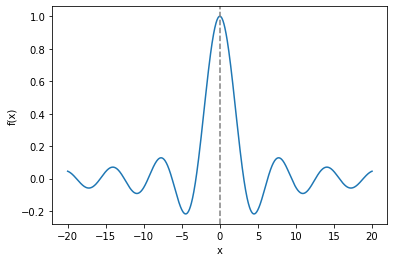

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy

x = sympy.symbols('x')
f = sympy.sin(x)/x

x_vals = np.linspace(-20, 20, 1000)
f_vals = np.array([f.subs(x, i) for i in x_vals])
plt.plot(x_vals, f_vals)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axvline(x=0, color='gray', linestyle='--')

plt.show()

-3.2.2 Derivatives

The derivative of a function of a real variable quantifies how responsive the function's value (or output value) is to changes in relation to other variables.

f ′(x0)= $df(x0)/dx$ = lim(h→0) $(f(x_0+h)−f(x_0))/h$

Rolle - Let f : [a,b]→ R be a continuous function and assume that its derivative exists on (a,b). If f (a)=f (b), then there is a <c <b such that f ′(c)=0.

In [ ]:
import sympy as sym
sym.diff(x**4)

4*x**3

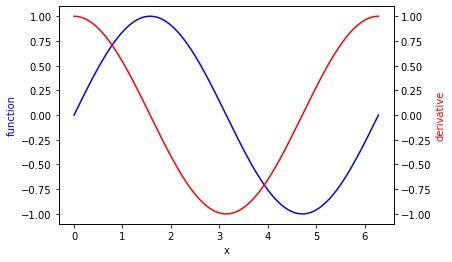

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

x = np.linspace(0, 2*np.pi, 1000)

h = x[1] - x[0]

df = np.zeros_like(x)
df[0] = (f(x[1]) - f(x[0])) / h
df[-1] = (f(x[-1]) - f(x[-2])) / h
df[1:-1] = (f(x[2:]) - f(x[:-2])) / (2*h)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, f(x), 'b-', label='function')
ax2.plot(x, df, 'r-', label='derivative')
ax1.set_xlabel('x')
ax1.set_ylabel('function', color='b')
ax2.set_ylabel('derivative', color='r')
plt.show()


-3.2.3 Taylor's Theorem

Taylor’s theorem gives an approximation of a differentiable function around a given point by a polynomial.

Let f : D → R where D ⊆ R. Suppose f has a m times continuous derivative on [a,b]. Then $f(b)=f(a)+(b−a)f′(a)+1/2(b−a)^2f′′(a)+...+(b−a)^{m−1}/((m − 1)!)*f^{m−1}(a)+R_m$,

where $R_m =((b−a)^m/(m)!)f^m(a+θ(b−a))$for some 0 <θ<1. 

***

**3.3 Unconstrained Optimization**

-3.3.1 Necessary and Sufficent Conditions of Local Minimizers


Global minimizer -  Let f : $R^d$ → R. The point x∗ ∈ $R^d$ is a global minimizer of f over $R^d$ if
f(x)≥ f($x^∗$),∀x ∈ $R^d$

Local minimizer - Let f : $R^d$ → R. The point $x^∗$ ∈ $R^d$ is a local minimizer of f over $R^d$ if there is δ>0 such that
f(x)≥ f ($x^∗$),∀x ∈ $B_δ(x^∗)$\ ${x^∗}$


-3.3.2 Convexity and Global Minimizers

Convex Set: A set D ⊆ Rd is convex if for all x,y ∈ D and all α ∈ [0,1] such that (1− α)x+αy ∈ D.


-3.3.3 Gradient Descent 

Gradient descent is an iterative optimization algorithm for finding a local
minimum of a differentiable function.

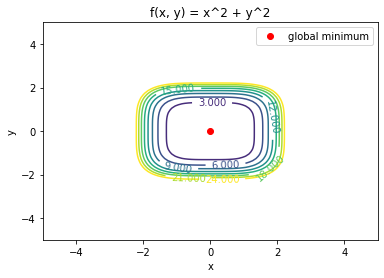

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x**4 + y**4

x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x_vals, y_vals)
z = f(x, y)

fig, ax = plt.subplots()
contours = ax.contour(x, y, z, levels=np.arange(0, 26, 3))
ax.clabel(contours, inline=True, fontsize=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('f(x, y) = x^2 + y^2')
ax.plot(0, 0, 'ro', label='global minimum')
ax.legend()
plt.show()


***

3.4 Logistic Regression

In its simplest form, a logistic function is used to describe a binary dependent variable in a model known as logistic regression. It may be expanded to include a variety of event types, such the classification of photographs.

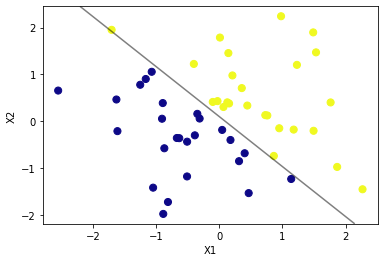

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

np.random.seed(0)
X = np.random.randn(50, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)
clf = LogisticRegression(random_state=0).fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='plasma')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['-'])

plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

***

3.5 K-means

The goal of the widely used vector quantization technique known as "k-means clustering" is to divide n observations into k clusters, with each observation belonging to the cluster that has the closest mean (also known as the cluster centroid or cluster center), which serves as the cluster's prototype. While normal Euclidean distances are not reduced by k-means clustering, within-cluster variances (squared Euclidean distances) are.

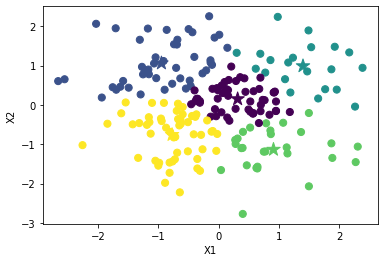

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

np.random.seed(0)
X = np.random.randn(200, 2)
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker='*', s=200, c=[0, 1, 2, 3, 4], cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

***

3.6 Support Vector Machine

Support-vector machines (SVMs) are supervised learning models used in machine learning with the goal of classifying and analyzing data for regression.

***

3.7 Neural Networks

An artificial neural network is made up of a number of interconnected layers that act as nodes or units to approximate the function of a biological brain's neurons.